In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
mask_array = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/mask_combined.npy")

In [3]:
mask_array.shape

(210, 128, 128, 128)

In [4]:
import random

In [7]:
rnd1  = random.randint(0,210)
rnd2  = random.randint(45,75)

random_mask = mask_array[rnd1,:,:,rnd2]

In [ ]:
random_mask.shape

(128, 128)

In [ ]:
hist = np.histogram(random_mask)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


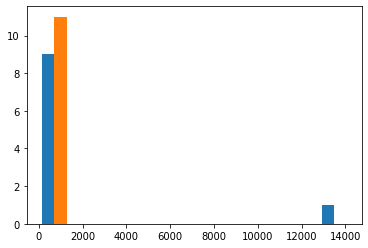

In [ ]:
plt.hist(hist)
plt.show()

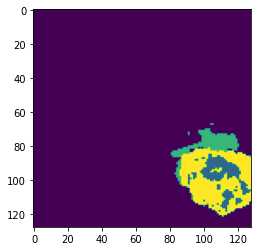

3

In [8]:


plt.imshow(random_mask)
plt.show()
np.max(random_mask)

In [9]:
np.max(random_mask)

3

In [10]:
to_cat = to_categorical(random_mask)

In [11]:
to_cat.shape

(128, 128, 4)

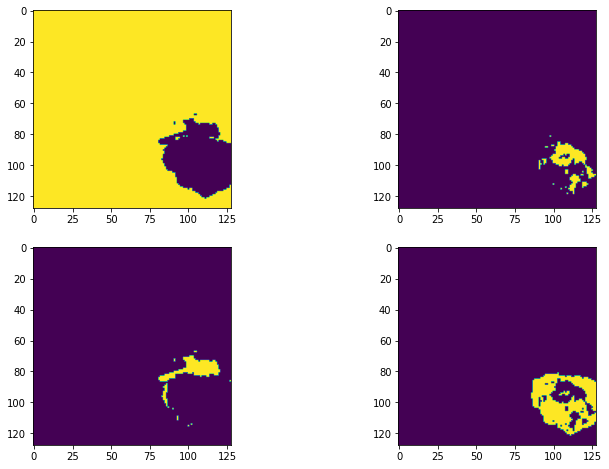

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(to_cat[:,:,0])
plt.subplot(222)
plt.imshow(to_cat[:,:,1])
plt.subplot(223)
plt.imshow(to_cat[:,:,2])
plt.subplot(224)
plt.imshow(to_cat[:,:,3])
plt.show()

In [13]:
to_cat[:,:,0] = 0

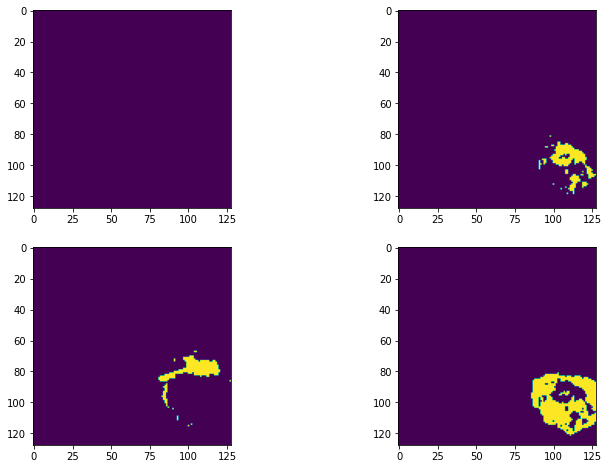

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(to_cat[:,:,0])
plt.subplot(222)
plt.imshow(to_cat[:,:,1])
plt.subplot(223)
plt.imshow(to_cat[:,:,2])
plt.subplot(224)
plt.imshow(to_cat[:,:,3])
plt.show()

In [15]:
to_cat.shape

(128, 128, 4)

In [17]:
org_mask = np.argmax(to_cat, axis = 2)

In [18]:
org_mask.shape

(128, 128)

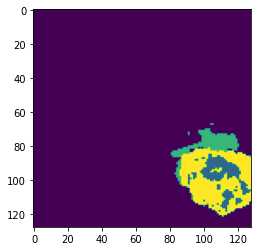

In [19]:
plt.imshow(org_mask)

In [ ]:
arr = np.arange(12)+1

In [ ]:
mask = np.ones(len(arr), dtype=bool)

In [ ]:
mask, arr

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

In [ ]:
mask[[0,2,4]] = False

In [ ]:
mask

array([False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
result = arr[mask,...]

In [ ]:
result

array([ 2,  4,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [ ]:
arr.shape

(3, 4)

In [ ]:
x  = to_categorical(arr)

In [ ]:
x

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]],
      dtype=float32)

In [ ]:
x.shape

(3, 4, 13)

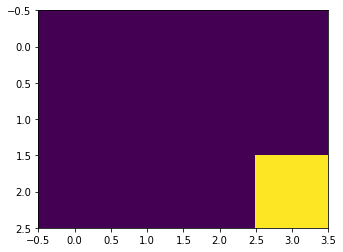

In [81]:
plt.imshow(x[:,:,12])

In [20]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import BatchNormalization

In [21]:
from keras.models import Model
from keras.layers import Input
from keras.layers.core import Activation, Reshape, Dense
from keras.layers.convolutional import Convolution2D
from keras.layers import BatchNormalization
#from keras import layers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [22]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))


In [23]:
dependencies = {
    'iou': iou,
    'dice_coef' : dice_coef,
    'precision' : precision,
    'recall' : recall,
    'accuracy' : accuracy
}

In [24]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Models/Model20 improved/SegNet21_model.h5',
                                       custom_objects = dependencies)

In [25]:
img_array = np.load("/content/drive/MyDrive/brain tumor segmentation/huzaifa data/Prepared_MRI_data/Origna_data_handling/Stack_Arrays/image_flair_combined.npy")

In [26]:
img_array.shape

(210, 128, 128, 128)

In [27]:
mask_array.shape

(210, 128, 128, 128)

In [28]:
image2D = []
for i in range(210):
  for j in range(128):
    image2D.append(img_array[i,:,:,j])

img_array = np.array(image2D)

In [29]:
mask2D = []
for i in range(210):
  for j in range(128):
    mask2D.append(mask_array[i,:,:,j])

mask_array = np.array(mask2D)

In [30]:
image2D = 0
mask2D = 0

In [31]:
img_array, x_test, mask_array, y_test = train_test_split(img_array, mask_array, test_size = 0.20)

In [32]:
x_test_exp = np.expand_dims(x_test, axis = 3)

In [33]:
prediction = new_model.predict(x_test_exp)

In [58]:
prediction.shape

(5376, 128, 128, 4)

In [34]:
pred=np.argmax(prediction, axis=3)

In [46]:
x_test.shape, y_test.shape, pred.shape

((5376, 128, 128), (5376, 128, 128), (5376, 128, 128))

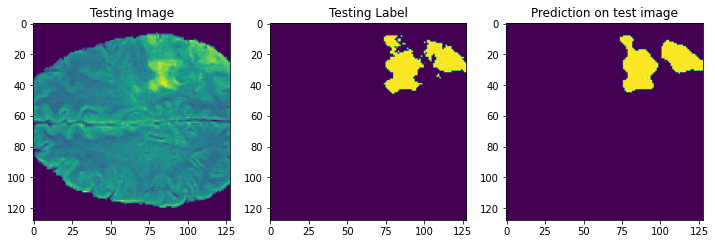

In [90]:
#n=random.randint(45,95)


image = random.randint(0,5376)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(x_test[image,:,:])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(y_test[image,:,:])
plt.subplot(133)
plt.title('Prediction on test image')
plt.imshow(pred[image,:,:])
plt.show()

In [ ]:
#########################################################################

In [92]:
prediction.shape, prediction.dtype

((5376, 128, 128, 4), dtype('float32'))

In [93]:
pred_without_background = prediction

for i in range(5376):
   pred_without_background[i,:,:,0] = 0

In [94]:
pred_wo_bkg = np.argmax(prediction, axis=3)

In [137]:
y_test_cat = to_categorical(y_test)

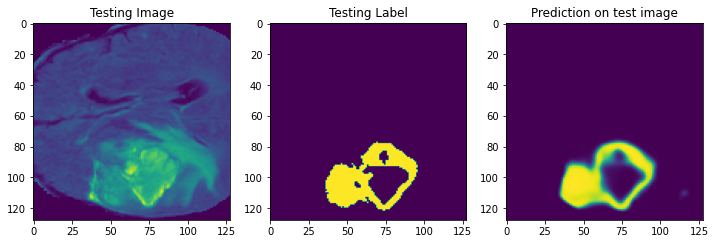

In [160]:


#image = random.randint(0,5376)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(x_test[image,:,:])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(y_test_cat[image,:,:,3])
plt.subplot(133)
plt.title('Prediction on test image')
plt.imshow(prediction[image,:,:,3])
plt.show()

In [161]:
acc = accuracy(y_test_cat[image,:,:,3], prediction[image,:,:,3])

In [162]:
acc

<tf.Tensor: shape=(), dtype=float32, numpy=0.9819946>

In [163]:
test = y_test_cat[image,:,:,3]
predxx = prediction[image,:,:,3]

In [ ]:
predxx=predxx[56:184, 56:184]

In [186]:
prediction1 = predxx[75:125,35:100]
test1 = test [75:125,35:100]

In [187]:
acc = accuracy(test1, prediction1)

In [188]:
acc

<tf.Tensor: shape=(), dtype=float32, numpy=0.90923077>

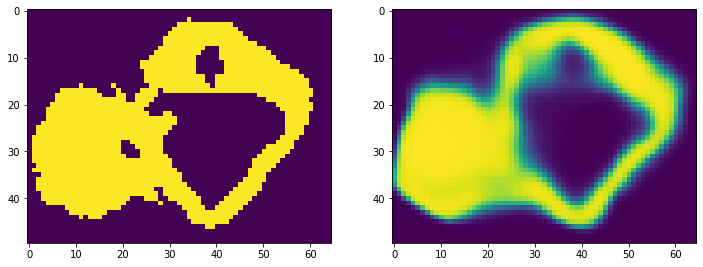

In [192]:
plt.figure(figsize=(12, 8))
plt.subplot(122)
plt.imshow(predxx[75:125,35:100])
plt.subplot(121)
plt.imshow(test[75:125,35:100])
plt.show()

In [ ]:
############################################################################

In [56]:
Mod_prediction = np.zeros((128,128,3), dtype = 'float64')
Mod_prediction.shape

(128, 128, 3)

In [78]:
predx = prediction[1900,:,:,:]

In [79]:
predx.shape, predx.dtype

((128, 128, 4), dtype('float32'))

In [80]:
Mod_prediction = np.zeros((128,128,3), dtype = 'float32')

In [81]:
Mod_prediction[:,:,0] = predx[:,:,1]
Mod_prediction[:,:,1] = predx[:,:,2]
Mod_prediction[:,:,2] = predx[:,:,3]


In [82]:
x = np.argmax(predx, axis = 2)
y = np.argmax(Mod_prediction, axis = 2)

In [83]:
x.shape, y.shape

((128, 128), (128, 128))

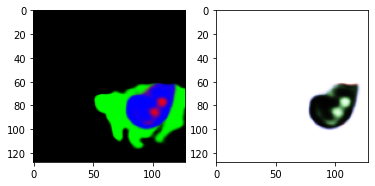

In [84]:
plt.subplot(121)
plt.imshow(Mod_prediction)
plt.subplot(122)
plt.imshow(predx)
plt.show()

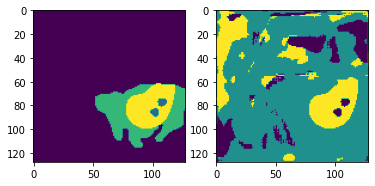

In [85]:
plt.subplot(121)
plt.imshow(x)
plt.subplot(122)
plt.imshow(y)
plt.show()